与其他电池电压一致性较差的电池有：
第10号电池，其电压偏差的均方差为566.22毫伏
第12号电池，其电压偏差的均方差为729.98毫伏
第20号电池，其电压偏差的均方差为581.40毫伏
第40号电池，其电压偏差的均方差为610.28毫伏
第60号电池，其电压偏差的均方差为696.43毫伏
第77号电池，其电压偏差的均方差为569.42毫伏


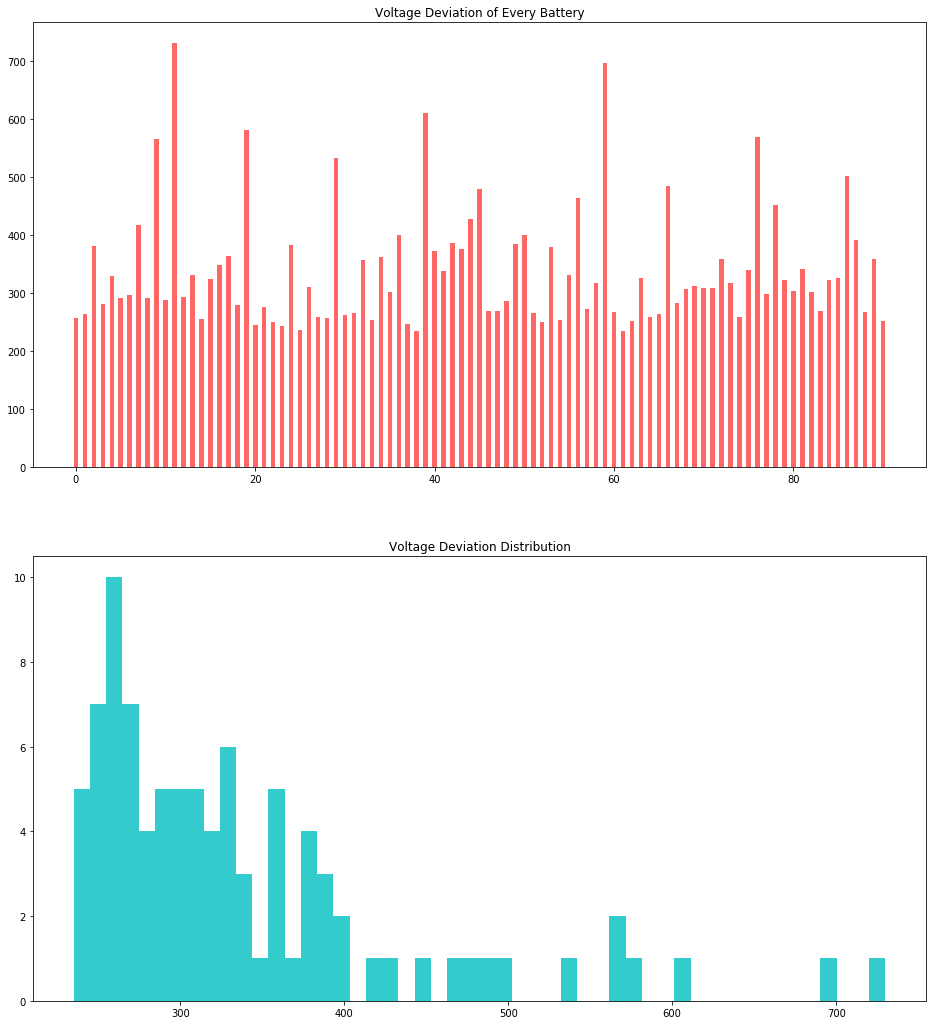

In [5]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd

def readlist(path,sheet,col):   #读组电压  参数为 路径 表格 数列
    
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    dataframe=[]
    for i in value:
        dt=[]
        for j in i.split(';'):
            dt.append(int(j))
        dataframe.append(dt)
    return dataframe

path=u'data/vehicle-京B7Y242-20150416133936.xls'
data=readlist(path,4,3)

ex=[]                               #各时间段电池组电压均值
voltage=[]
for value in data:
    s=0
    for i in value:
        s+=i
    e=float(s)/len(value)
    ex.append(e)
    
for j in range(len(data[0])):           #单个电池与均值差值总和
    s=0
    for i in range(len(data)):
        s+=np.square((data[i][j]-ex[i]))
    voltage.append(round((np.sqrt(s)),2))
i=0
overvt=[]
for vt in voltage:
    i+=1
    if (vt-sum(voltage)/len(voltage))>np.std(voltage)*2:
        overvt.append([vt,i])

fig=plt.figure()
fig.set_size_inches(16,18)
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
ax1.set_title('Voltage Deviation of Every Battery',fontsize='large')
ax2.set_title('Voltage Deviation Distribution',fontsize='large')
m=ax1.bar(range(len(voltage)),voltage,0.5,color='r',alpha=0.6)
n=ax2.hist(voltage,50,color='c',alpha=0.8)

print (u'与其他电池电压一致性较差的电池有：')
for i in overvt:
    print (u'第%d号电池，其电压偏差的均方差为%.2f毫伏'%(i[1],i[0]))

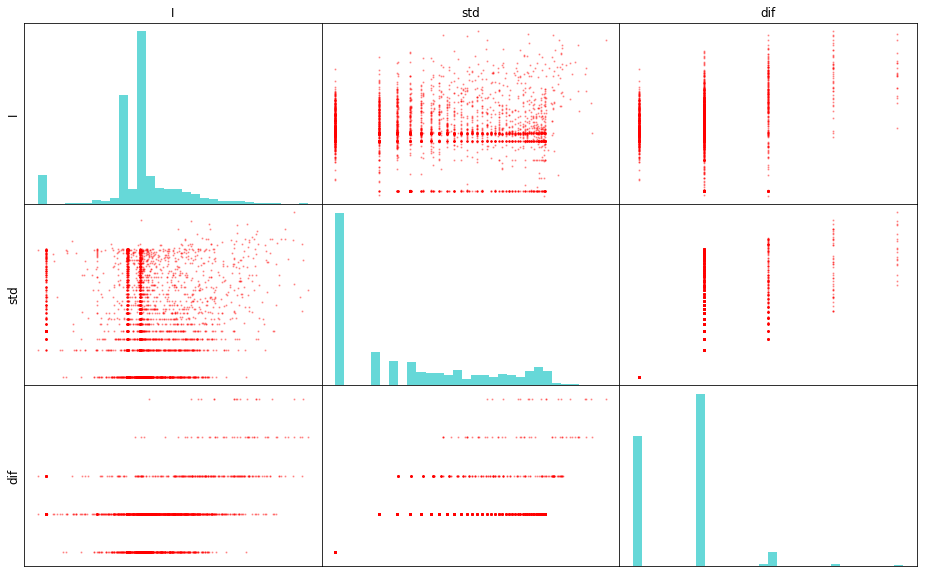

In [8]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd

def readlist(path,sheet,col):   #读组电压  参数为 路径 表格 数列
    
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    dataframe=[]
    for i in value:
        dt=[]
        for j in i.split(';'):
            dt.append(int(j))
        dataframe.append(dt)
    return dataframe

def readata(path,sheet,col,chop):   #参数为 路径 表格 数列 单位字符数
    i=0
    dt=[]
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    for val in value:
        i+=1
        if i>1:
            if chop==0:
                dt.append(float(val.encode('utf-8')))
            else:
                dt.append(float(val[:-chop].encode('utf-8')))
    return dt

def claly(datalist,labels):                                 #多变量相关性分析绘图  参数为  变量组  变量标签
    n=len(labels)
    fig,axes=plt.subplots(n,n,sharex=False,sharey=False)
    fig.set_size_inches(16,10)
    plt.subplots_adjust(wspace=0,hspace=0)
    for i in range(n):
        for j in range(n):
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            if i==0:
                axes[i,j].set_title(labels[j],fontsize='large')
            if j==0:
                axes[i,j].set_ylabel(labels[i],fontsize='large')
            if i==j:
                axes[i,i].hist(datalist[i],30,color='c',alpha=0.6)
            else:
                axes[i,j].scatter(datalist[j],datalist[i],marker='.',s=5,color='r',alpha=0.3)

path=u'data/vehicle-京B7Y242-20150416133936.xls'
V=readlist(path,4,3)
I=readata(path,0,17,1)
max=readata(path,0,5,1)
min=readata(path,0,8,1)

dif=[]
for i in range(len(max)):
    dif.append(max[i]-min[i])

std=[]
for vt in V:
    std.append(np.std(vt))

datalist=[I,std,dif]
labels=['I','std','dif']

if __name__ =='__main__':
    claly(datalist,labels)

